# Final Project 2

Kelompok 5:

- Kevin Anggara Putra
- Daniel Leksono
- Ines Savitri

## A. Perkenalan

### Data yang digunakan
Dataset yang digunakan berasal dari web kaggle dataset https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package, yang memiliki 23 atribut, dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika "Yes" maka besok harinya disana hujan 1mm atau lebih.

### Attribute Information:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi


### Variable Information
..


## B. Import Pustaka

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split

## C. Data Loading

In [2]:
                                                                    # Download datasets
df =  pd.read_csv('weatherAUS.csv')

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Mengetahui jumlah data
df.shape

(145460, 23)

In [4]:
# Mengetahui tipe data
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# Mengetahui data unik setiap kolom
for col in df.columns :
  print(col, 'Unique Value')
  print(df[col].unique())
  print('-'*100)

Date Unique Value
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
----------------------------------------------------------------------------------------------------
Location Unique Value
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
----------------------------------------------------------------------------------------------------
MinTemp Unique Value
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8


## D. Data Cleaning

In [7]:
# Mengetahui missing value pada setiap baris dan kolom
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Cleansing data dengan standar missing value
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Dari output di atas dapat diketahui bahwa terdapat banyak Missing Value yang harus dibersihkan.

In [9]:
# Mengetahui apakah terdapat duplikasi data dalam dataset
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Length: 145460, dtype: bool

In [10]:
df.duplicated().sum()

0

Dari output di atas dapat diketahui bahwa tidak terdapat data yang duplikat.

In [11]:
# Melihat kolom berdasarkan tipe data categori
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Ada {} index categori\n'.format(len(categorical)))

print('Yaitu :', categorical)

Ada 7 index categori

Yaitu : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [13]:
# Melihat apakah terdapat missing value pada data kategori
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

Dari output di atas, dapat diketahui terdapat missing value pada beberapa kolom data tipe categori.

In [14]:
# Melihat kolom berdasarkan tipe data numerical
numerical = [var for var in df.columns if df[var].dtype!='O']

print('Ada {} index categori\n'.format(len(numerical)))

print('Yaitu :', numerical)

Ada 16 index categori

Yaitu : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [15]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [16]:
# Melihat apakah terdapat missing value pada data kategori
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

Dari output di atas, dapat diketahui terdapat missing value pada beberapa kolom data tipe numerical.

In [17]:
# Mengubah tipe data kolom 'Date' menjadi tipe data 'datetime'
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
# Memisahkan kolom 'Date' berdasarkan tahun, bulan, dan tanggal pada kolom terpisah.
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Menghapus kolom 'Date'
df.drop('Date', axis=1, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

Dari output di atas setelah memisahkan kolom 'Date' menjadi 'Year', 'Month', 'Day', lalu menghapus kolom 'Date'. 
Jumlah kolom pada data otomatis bertambah menjadi 24 kolom dari 21 kolom.

## E. Explorasi Data

In [20]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


### Explorasi data berdasarkan tipe data categori

In [21]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Ada {} index categori\n'.format(len(categorical)))

print('Yaitu :', categorical)

Ada 6 index categori

Yaitu : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [22]:
df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [23]:
# Memanipulasi data kolom 'WindGustDir'
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

In [24]:
# Memanipulasi data kolom 'WindDir9am'
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

In [25]:
# Memanipulasi data kolom 'WindDir3pm'
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

In [26]:
# Memanipulasi data kolom 'RainToday'
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

In [27]:
# Memanipulasi data kolom 'RainTomorrow'
pd.get_dummies(df.RainTomorrow, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31877
NaN     3267
dtype: int64

In [28]:
# Menghapus semua data null berdasarkan subset kolom 'RainTomorrow'
df.dropna(how = 'any', subset = 'RainTomorrow', inplace = True)

In [29]:
pd.get_dummies(df.RainTomorrow, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31877
NaN        0
dtype: int64

In [30]:
#df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)  #TEST

d = {'No':0, 'Yes':1}
df['RainTomorrow'] = df['RainTomorrow'].map(d)

In [31]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,1021.2,NaN,NaN,9.4,20.9,No,0,2017,6,20
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,0,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,0,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,0,2017,6,23


Text(0, 0.5, 'RainTomorrow')

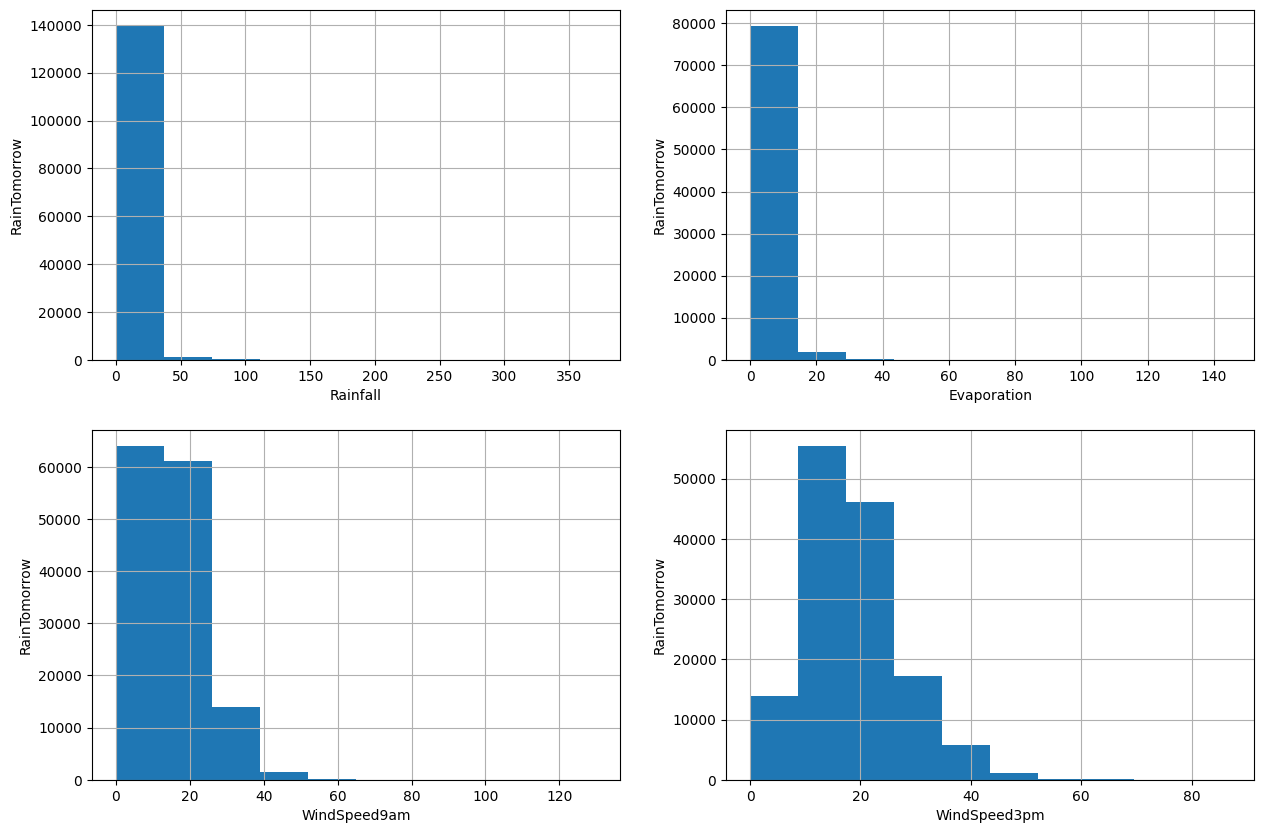

In [32]:
# Melihat persebaran distribusi

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

### Explorasi data berdasarkan tipe data numeric

In [33]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('Ada {} index categori\n'.format(len(numerical)))

print('Yaitu :', numerical)

Ada 20 index categori

Yaitu : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow', 'Year', 'Month', 'Day']


In [34]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [35]:
print(round(df[numerical].describe()))

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Berdasarkan deskripsi bisa kita liat pada Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm memiliki outliers yang cukup signifikan.

In [36]:
# Handling Outliers kolom Rainfall
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


Dari output di atas, dapat kita ketahui setelah dilakukan metode 'Handling Outliers' pada kolom 'Rainfall' memiliki nilai outliers kurang dari -2.4 atau lebih dari 3.2

In [37]:
# Handling Outliers kolom 'Evaporation'
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


Dari output di atas, dapat kita ketahui setelah dilakukan metode 'Handling Outliers' pada kolom 'Evaporation' memiliki nilai outliers kurang dari -11.8 atau lebih dari 21.8

In [38]:
# Handling Outliers kolom 'WindSpeed9am'
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


Dari output di atas, dapat kita ketahui setelah dilakukan metode 'Handling Outliers' pada kolom 'WindSpeed9am' memiliki nilai outliers kurang dari -29.0 atau lebih dari 55.0

In [39]:
# Handling Outliers kolom 'WindSpeed3pm'
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


Dari output di atas, dapat kita ketahui setelah dilakukan metode 'Handling Outliers' pada kolom 'WindSpeed3pm' memiliki nilai outliers kurang dari -20.0 atau lebih dari 57.0

Text(0, 0.5, 'WindSpeed3pm')

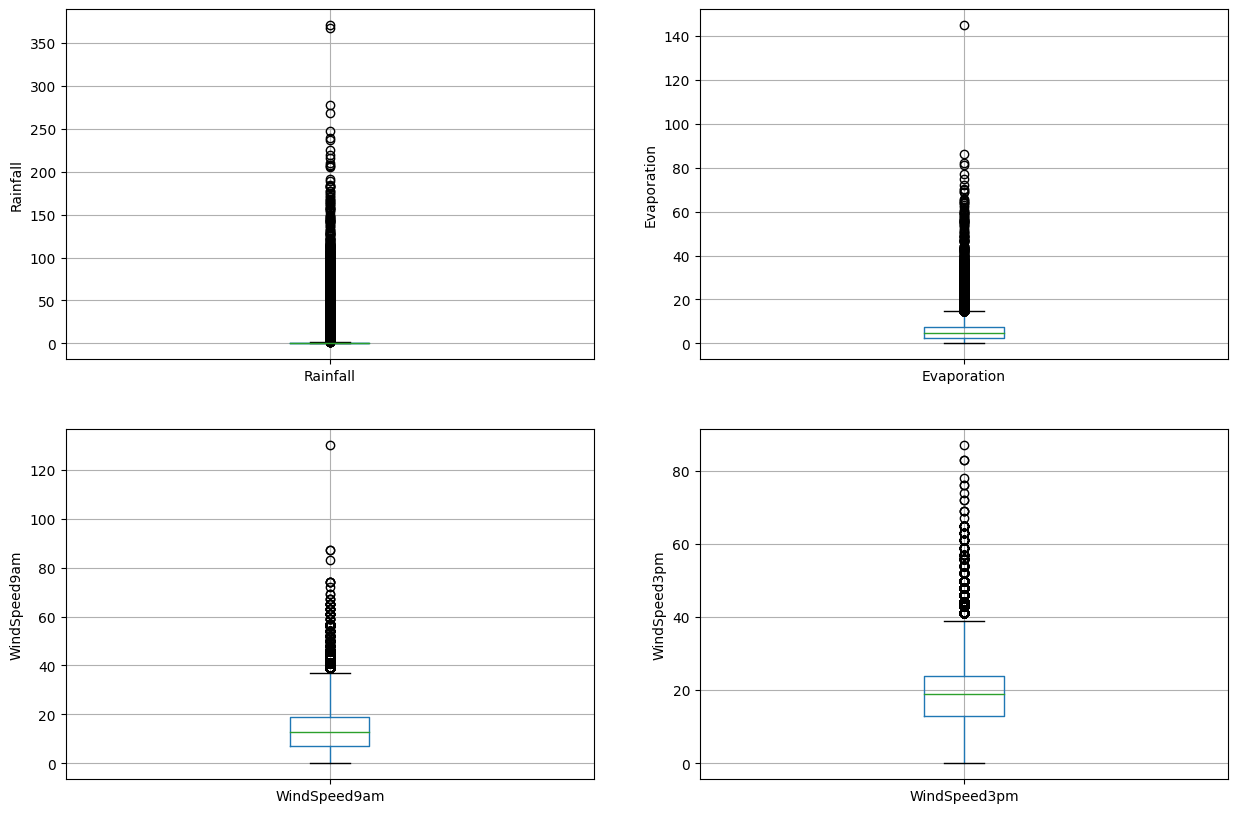

In [40]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

## F. Data Preprocessing

In [41]:
x = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [43]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((113754, 24), (113754,), (28439, 24), (28439,))

In [44]:
x_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [45]:
# 'b'       boolean
# 'i'       (signed) integer
# 'u'       unsigned integer
# 'f'       floating-point
# 'c'       complex-floating point
# 'O'       (Python) objects
# 'S', 'a'  (byte-)string
# 'U'       Unicode
# 'V'       raw data (void)

categorical = [col for col in x_train.columns if x_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [46]:
numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [47]:
x_train[numerical].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [48]:
x_test[numerical].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [49]:
# Mengetahui mean dari kolom numercial
for col in numerical:
    if x_train[col].isnull().mean()>0:
        print(col, round(x_train[col].isnull().mean(),4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


In [50]:
# Mengetahui median dari kolom numercial
for df1 in [x_train, x_test]:
    for col in numerical:
        col_median=x_train[col].median()
        df1[col].fillna(col_median, inplace=True)    

In [51]:
x_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [52]:
x_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [53]:
x_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [54]:
x_test[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.067618
WindDir9am     0.071557
WindDir3pm     0.027075
RainToday      0.009389
dtype: float64

In [55]:
for col in categorical:
    if x_train[col].isnull().mean()>0:
        print(col, (x_train[col].isnull().mean()))

WindGustDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [56]:
for df2 in [x_train, x_test]:
    df2['WindGustDir'].fillna(x_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(x_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(x_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(x_train['RainToday'].mode()[0], inplace=True)

In [57]:
x_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [58]:
x_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [59]:
# Bounderies data untuk kolom 'Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm'
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [x_train, x_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [60]:
x_train.Rainfall.max(), x_test.Rainfall.max()

(3.2, 3.2)

In [61]:
x_train.Evaporation.max(), x_test.Evaporation.max()

(21.8, 21.8)

In [62]:
x_train.WindSpeed9am.max(), x_test.WindSpeed9am.max()

(55.0, 55.0)

In [63]:
x_train.WindSpeed3pm.max(), x_test.WindSpeed3pm.max()

(57.0, 57.0)

In [64]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [65]:
x_train.isnull()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
113462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
89638,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
138130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16484,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
100206,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98494,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
120883,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
# Label Encoder split data kolom 'RainToday'
encoder = ce.BinaryEncoder(cols=['RainToday'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [67]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,1013.4,5.0,5.0,18.8,20.4,0,1,2014,4,25
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,2
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,19
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,30
16484,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,1015.2,5.0,8.0,22.2,27.0,0,1,2012,11,8


In [68]:
x_train = pd.concat([x_train[numerical], x_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_train.Location), 
                     pd.get_dummies(x_train.WindGustDir),
                     pd.get_dummies(x_train.WindDir9am),
                     pd.get_dummies(x_train.WindDir3pm)], axis=1)

x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
113462,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,1,0,0,0,0,0,0,0
89638,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,1,0,0,0,0,0,0
138130,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
87898,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16484,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,0,1,0,0,0,0,0,0


In [69]:
x_test = pd.concat([x_test[numerical], x_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_test.Location), 
                     pd.get_dummies(x_test.WindGustDir),
                     pd.get_dummies(x_test.WindDir9am),
                     pd.get_dummies(x_test.WindDir3pm)], axis=1)

x_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
88578,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
59016,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,0,1,0,0,0,0,0,0,0
127049,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,1,0,0,0,0,0
120886,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,0,1,0,0,0
136649,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
x_test.dtypes[80:100]

SSE    uint8
SSW    uint8
SW     uint8
W      uint8
WNW    uint8
WSW    uint8
E      uint8
ENE    uint8
ESE    uint8
N      uint8
NE     uint8
NNE    uint8
NNW    uint8
NW     uint8
S      uint8
SE     uint8
SSE    uint8
SSW    uint8
SW     uint8
W      uint8
dtype: object

In [71]:
x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scalling Data

In [72]:
x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
cols = x_train.columns

In [74]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [75]:
x_train = pd.DataFrame(x_train, columns=[cols])

In [76]:
x_test = pd.DataFrame(x_test, columns=[cols])

In [77]:
x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.210962,0.236312,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.369949,0.129528,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## G. Pendefinisian Model

### Model : Logistic Regression

Logistic Regression adalah teknik regresi yang berfungsi untuk memisahkan dataset menjadi dua bagian (kelompok).

In [78]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [79]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [80]:
# Mengetahui kemungkinan tidak hujan

logreg.predict_proba(x_test)[:,0]

array([0.91387998, 0.83563444, 0.82035815, ..., 0.97675232, 0.79856396,
       0.30735445])

In [81]:
# Mengetahui kemungkinan hujan

logreg.predict_proba(x_test)[:,1]

array([0.08612002, 0.16436556, 0.17964185, ..., 0.02324768, 0.20143604,
       0.69264555])

Berdasarkan output di atas, dapat kita ketahui,
*Nilai kemungkinan untuk tidak hujan* lebih besar dari *Nilai kemungkinan hujan*.

### Model : Support Vector Machine

Metode SVM dapat digunakan untuk menganalisis data dan mengurutkannya ke dalam satu dari dua kategori.

In [82]:
svm_method = SVC(kernel='linear')
svm_method.fit(x_train, y_train)

y_pred = svm_method.predict(x_test) #Revise soon

## H. Pelatihan Model

Check Accuracy Logistic Regression

In [ ]:
print('Model accuracy score Logistic Regression: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score Logistic Regression: 0.8502


Berdasarkan output di atas, kita mendapatkan tingkat akurasi model Logistic Regression sebesar 0.85,

Check Accuracy Super Vector Mechine

In [ ]:
print('Model accuracy score SVM: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score SVM: 0.8505


Berdasaekan output di atas, kita mendapatkan tingkat akurasi model Support Vector Machine sebesar 0.8504

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
# List Parameter yang akan diuji
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define model and parameters
hyperparameters = dict(solver=solvers, penalty=penalty, C=c_values)
logreg = LogisticRegression()


grid_search = GridSearchCV(estimator=logreg, param_grid=hyperparameters, n_jobs=-1, cv=10, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)

**Logistic Regression**

In [ ]:
#Prediksi menggunakan model baru
y_pred_lr_hyper = grid_result.predict(x_test) #Revise soon

#Check performa dari model
print('Accuracy Score: ', accuracy_score(y_test, y_pred_lr_hyper))
print(classification_report(y_test, y_pred_lr_hyper))
roc_auc_score(y_test, y_pred_lr_hyper)

Accuracy Score:  0.8505221702591511
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22067
           1       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



0.7316731877816264

**Support Vector Mechine**

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

Accuracy Score: 0.8504870072787369
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22067
           1       0.76      0.49      0.59      6372

    accuracy                           0.85     28439
   macro avg       0.81      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439



0.7215489139378672

## I. Evaluasi Model

In [ ]:
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr_hyper))

Logistic Regression: 0.8505221702591511


In [ ]:
y_pred_prob = logreg.predict_proba(x_test)[0:10]

y_pred_prob

array([[0.91387998, 0.08612002],
       [0.83563444, 0.16436556],
       [0.82035815, 0.17964185],
       [0.99025727, 0.00974273],
       [0.95727641, 0.04272359],
       [0.97992446, 0.02007554],
       [0.17844333, 0.82155667],
       [0.23482354, 0.76517646],
       [0.90053171, 0.09946829],
       [0.85483239, 0.14516761]])

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error', rmse)

Mean Squared Error: 0.14982945954499102
Mean Absolute Error: 0.14982945954499102
Root Mean Squared Error 0.3870781052255359


Berdasarkan output di atas:
Nilai Mean Squared Error (MSE) adalah rata-rata kesalahan kuadrat antara nilai aktual dan nilai peramalan, output menunjukkan angka 0.15 %
Nilai Mean Absolute Error (MAE) merupakan nilai kesalahan rata-rata yang *error* pada anailisis time series, output menunjukkan angka 0.15 %
Nilai Root Mean Square Error (RMSE) merupakan besarnya tingkat kesalahan hasil prediksi, semakin kecil (mendekati 0) maka hasil prediksi akan semakin akurat, output menunjukkan angka 0.38 %

In [92]:
print("accuracy :" + str(logreg.score(x_test, y_test)))
print("variance :" + str(explained_variance_score(y_test, y_pred_test)))

accuracy :0.850170540455009
variance :0.16417121332621398


## J. Model Inference

In [113]:
from sklearn.metrics import roc_curve, auc

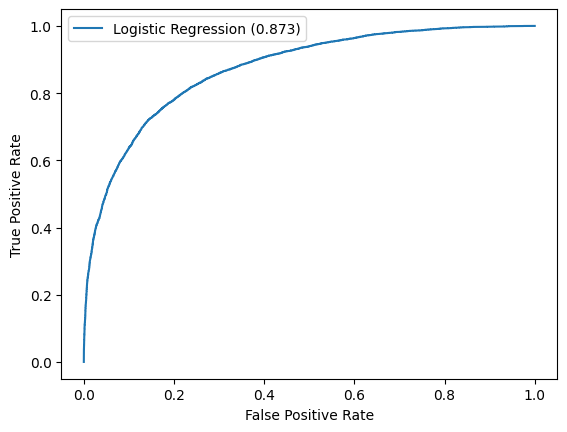

In [121]:
y_pred_proba1 = grid_result.predict_proba(x_test)[::,1]
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1)
auc1 = auc(fpr1, tpr1)

# y_pred_proba2 = svm_method.predict_proba(x_test)[::,1]
# fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)
# auc2 = auc(fpr2, tpr2)

plt.plot(fpr1,tpr1, label='Logistic Regression (%0.3f)' % auc1)
#plt.plot(fpr2,tpr2, label='SVM (%0.3f)' % auc2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.show()

## K. Pengambilan Kesimpulan